In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate means and standard errors for each group and direction
stats = results.groupby(['dir', 'group'])['offer'].agg(['mean', 'sem']).reset_index()

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define colors for each group
colors = {
    'white_m': '#4472C4',
    'white_f': '#70AD47',
    'black_m': '#FFC000',
    'black_f': '#C55A11'
}

# Plot for 'buy' direction
buy_data = stats[stats['dir'] == 'buy']
x_pos = np.arange(len(buy_data))
axes[0].bar(x_pos, buy_data['mean'], yerr=buy_data['sem'], 
            color=[colors[g] for g in buy_data['group']], 
            capsize=5, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Group', fontsize=12)
axes[0].set_ylabel('Offer ($)', fontsize=12)
axes[0].set_title('Buy Direction: Initial Offer by Group', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(buy_data['group'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot for 'sell' direction
sell_data = stats[stats['dir'] == 'sell']
x_pos = np.arange(len(sell_data))
axes[1].bar(x_pos, sell_data['mean'], yerr=sell_data['sem'], 
            color=[colors[g] for g in sell_data['group']], 
            capsize=5, alpha=0.8, edgecolor='black', linewidth=1.2)
axes[1].set_xlabel('Group', fontsize=12)
axes[1].set_ylabel('Offer ($)', fontsize=12)
axes[1].set_title('Sell Direction: Initial Offer by Group', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(sell_data['group'], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print the statistics
print("\nSummary Statistics:")
print(stats.to_string(index=False))

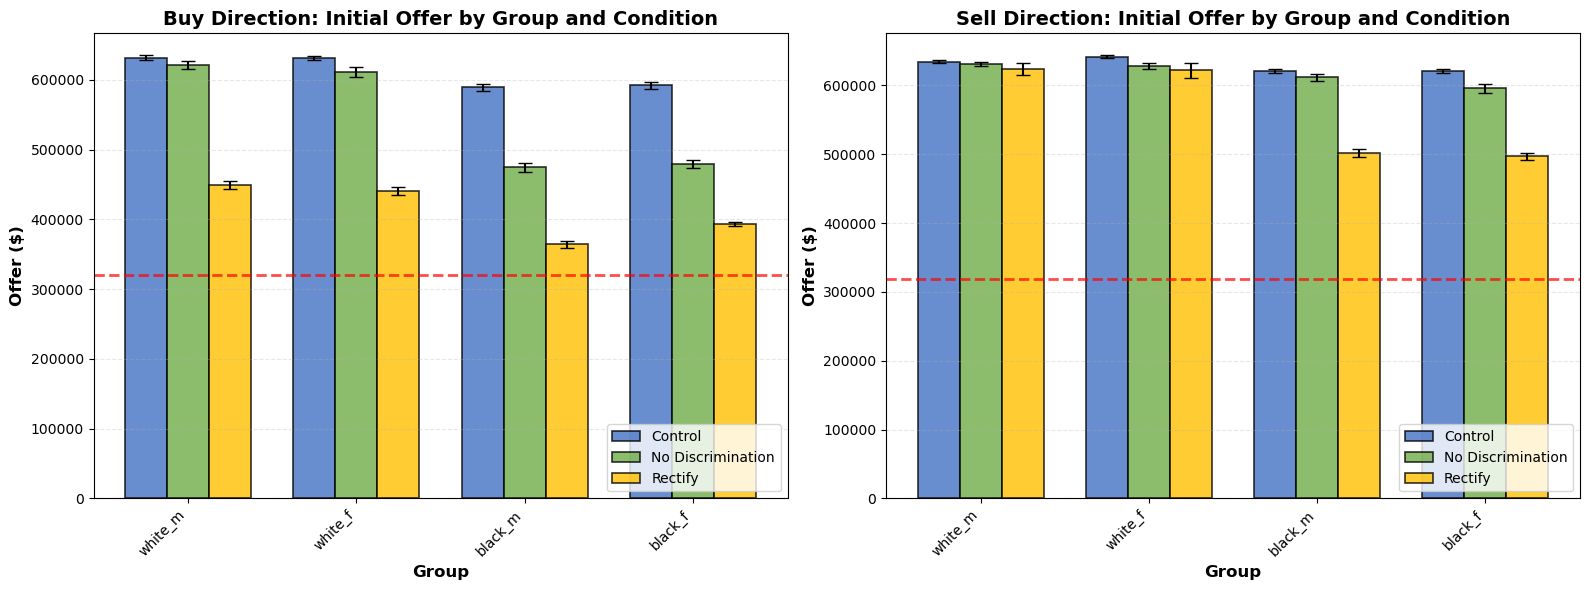


Summary Statistics:
 dir   group         condition     mean          sem
 buy black_f           Control 592525.0  5181.989187
 buy black_f No Discrimination 479187.5  5786.581317
 buy black_f           Rectify 393500.0  2514.829435
 buy black_m           Control 589200.0  5215.270389
 buy black_m No Discrimination 474500.0  5990.234669
 buy black_m           Rectify 364062.5  5594.480320
 buy white_f           Control 631775.0  2794.668628
 buy white_f No Discrimination 610937.5  6974.804197
 buy white_f           Rectify 440750.0  5529.051582
 buy white_m           Control 632125.0  2914.923803
 buy white_m No Discrimination 621250.0  5983.561342
 buy white_m           Rectify 449000.0  5378.402662
sell black_f           Control 621325.0  3195.764608
sell black_f No Discrimination 595812.5  6714.359583
sell black_f           Rectify 496937.5  5213.399962
sell black_m           Control 620825.0  3350.500131
sell black_m No Discrimination 612125.0  5218.163719
sell black_m           Re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the three CSV files
df_control = pd.read_csv('.logs/s0-results.csv')
df_no_disc = pd.read_csv('.logs/s0-results-no-discrimination-2.csv')
df_rectify = pd.read_csv('.logs/s0-results-rectify.csv')

# Add condition label to each dataframe
df_control['condition'] = 'Control'
df_no_disc['condition'] = 'No Discrimination'
df_rectify['condition'] = 'Rectify'

# Combine all dataframes
df_all = pd.concat([df_control, df_no_disc, df_rectify], ignore_index=True)

# Calculate means and standard errors for each group, direction, and condition
stats = df_all.groupby(['dir', 'group', 'condition'])['offer'].agg(['mean', 'sem']).reset_index()

# Create two subplots side by side (buy and sell)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for each condition
condition_colors = {
    'Control': '#4472C4',
    'No Discrimination': '#70AD47',
    'Rectify': '#FFC000'
}

# Define group order
groups = ['white_m', 'white_f', 'black_m', 'black_f']
conditions = ['Control', 'No Discrimination', 'Rectify']

# Bar width and spacing
bar_width = 0.25
group_spacing = 1.0

# Plot for 'buy' direction
buy_data = stats[stats['dir'] == 'buy']
for i, group in enumerate(groups):
    group_data = buy_data[buy_data['group'] == group]
    for j, condition in enumerate(conditions):
        condition_data = group_data[group_data['condition'] == condition]
        if not condition_data.empty:
            x_pos = i * group_spacing + j * bar_width
            axes[0].bar(x_pos, condition_data['mean'].values[0], 
                       yerr=condition_data['sem'].values[0],
                       width=bar_width, color=condition_colors[condition],
                       capsize=5, alpha=0.8, edgecolor='black', linewidth=1.2,
                       label=condition if i == 0 else '')

axes[0].axhline(y=320000, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Group', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Offer ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Buying from [name]: Initial Offer by Group and Condition', fontsize=14, fontweight='bold')
axes[0].set_xticks([i * group_spacing + bar_width for i in range(len(groups))])
axes[0].set_xticklabels(groups, rotation=45, ha='right')
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot for 'sell' direction
sell_data = stats[stats['dir'] == 'sell']
for i, group in enumerate(groups):
    group_data = sell_data[sell_data['group'] == group]
    for j, condition in enumerate(conditions):
        condition_data = group_data[group_data['condition'] == condition]
        if not condition_data.empty:
            x_pos = i * group_spacing + j * bar_width
            axes[1].bar(x_pos, condition_data['mean'].values[0], 
                       yerr=condition_data['sem'].values[0],
                       width=bar_width, color=condition_colors[condition],
                       capsize=5, alpha=0.8, edgecolor='black', linewidth=1.2,
                       label=condition if i == 0 else '')

axes[1].axhline(y=318800, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Group', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Offer ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Selling to [name]: Initial Offer by Group and Condition', fontsize=14, fontweight='bold')
axes[1].set_xticks([i * group_spacing + bar_width for i in range(len(groups))])
axes[1].set_xticklabels(groups, rotation=45, ha='right')
axes[1].legend(loc='lower right')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print the statistics
print("\nSummary Statistics:")
print(stats.to_string(index=False))